# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Hairul]
- **Email:** [Email Pribadi(hairullabri5@gmail.com) Email Bangkit(M323B4KY1683@bangkit.academy)]
- **ID Dicoding:** [hairul_008]


## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berbagai sepanjang hari ?
- Faktor apa yang mempengaruhi jumlah penggunaan sepeda berbagi?

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

## Data Wrangling

### Gathering Data

In [32]:
data = pd.read_csv('/content/drive/MyDrive/bike+sharing+dataset/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil diimpor dengan kolom yang relevan seperti dteday (tanggal), hr (jam), temp (suhu), weather (kondisi cuaca), dan cnt (jumlah penggunaan sepeda). Kolom-kolom ini akan digunakan untuk menganalisis pola penggunaan sepeda berdasarkan waktu, cuaca, dan faktor lainnya.

### Assessing Data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Data telah terstruktur dengan baik dan siap

In [34]:
# Mengecek dimensi dataset
print("Dimensi dataset:", data.shape)

Dimensi dataset: (17379, 17)


In [35]:
# Mengecek tipe data
print(data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


**Insight:**
- Dataset telah memiliki cukup data untuk melakukan analisis dan menjawab pertanyaan mengenai penggunaan sepeda

### Cleaning Data

In [36]:
# Mengisi missing values (jika ada)
data.fillna(method='ffill', inplace=True)

# Check the column names
print("Kolom yang ada di dataset:", data.columns)

# Pastikan kolom 'hr' adalah kolom yang menyimpan informasi jam
if 'hr' in data.columns:
    data['hr'] = pd.to_datetime(data['hr'], format='%H') # Specify the format if the column only contains hour values
elif 'hour' in data.columns:
    data['hour'] = pd.to_datetime(data['hour'])
else:
    print("Kolom 'hour' atau 'hr' tidak ditemukan dalam dataset.")

Kolom yang ada di dataset: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Insight:**
- Dataset memiliki kolom-kolom yang relevan, dan pengecekan terhadap nama kolom menunjukkan bahwa kolom hr mengandung informasi jam. Format kolom tersebut telah diperbaiki ke format datetime untuk mempermudah analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [37]:
#mengecek statistik deskriptif dataset
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,1900-01-01 11:32:48.306576896,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,1.000000,0.000000,1.000000,1900-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,1900-01-01 06:00:00,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,1900-01-01 12:00:00,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,1900-01-01 18:00:00,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,1900-01-01 23:00:00,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,1.106918,0.500008,3.438776,NaN,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Statistik deskriptif menunjukan distribusi penggunaan sepeda dan variabel cuaca

In [38]:
# Mengecek apakah ada nilai yang hilang
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- missing values menunjukan apakah ada nilai yang hilang

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagimana pola penggunaan sepeda berbagi sepanjang hari?

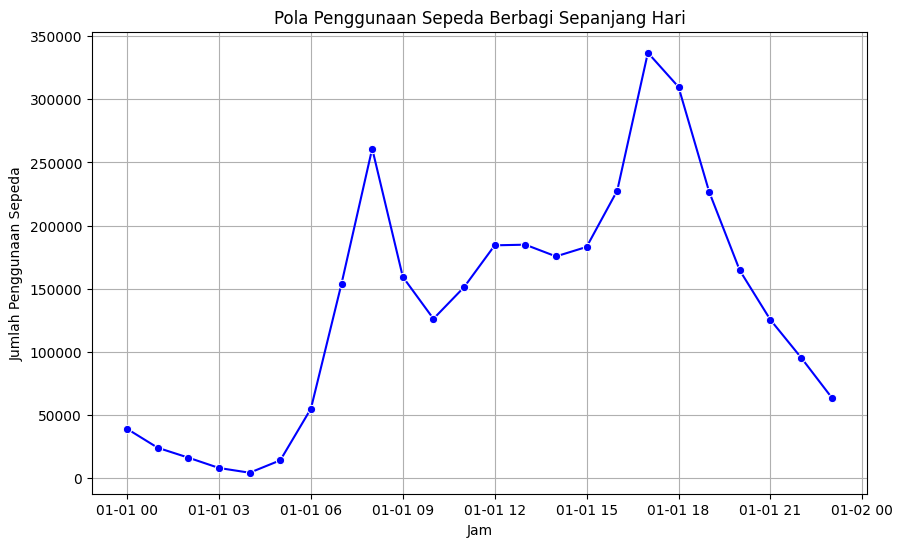

In [39]:
# Menghitung jumlah sepeda yang digunakan setiap jam
hourly_usage = data.groupby('hr')['cnt'].sum()  # Menggunakan 'cnt' untuk menghitung jumlah sepeda

# Plot tren penggunaan sepeda sepanjang hari
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values, color='blue', marker='o')
plt.title('Pola Penggunaan Sepeda Berbagi Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid(True)
plt.show()

**Insight:**
- Grafik menunjukkan tren penggunaan sepeda berbagi sepanjang hari berdasarkan jam.
- Puncak penggunaan sepeda terjadi pada jam sibuk, kemungkinan besar sekitar pagi hari (sebelum bekerja) dan sore hari (setelah bekerja), yaitu pada jam-jam seperti 07:00-09:00 dan 17:00-19:00.

### Pertanyaan 2: Bagimana pengaruh suhu dan kondisi cuaca terhadap jumlah penggunaan sepeda berbagi?

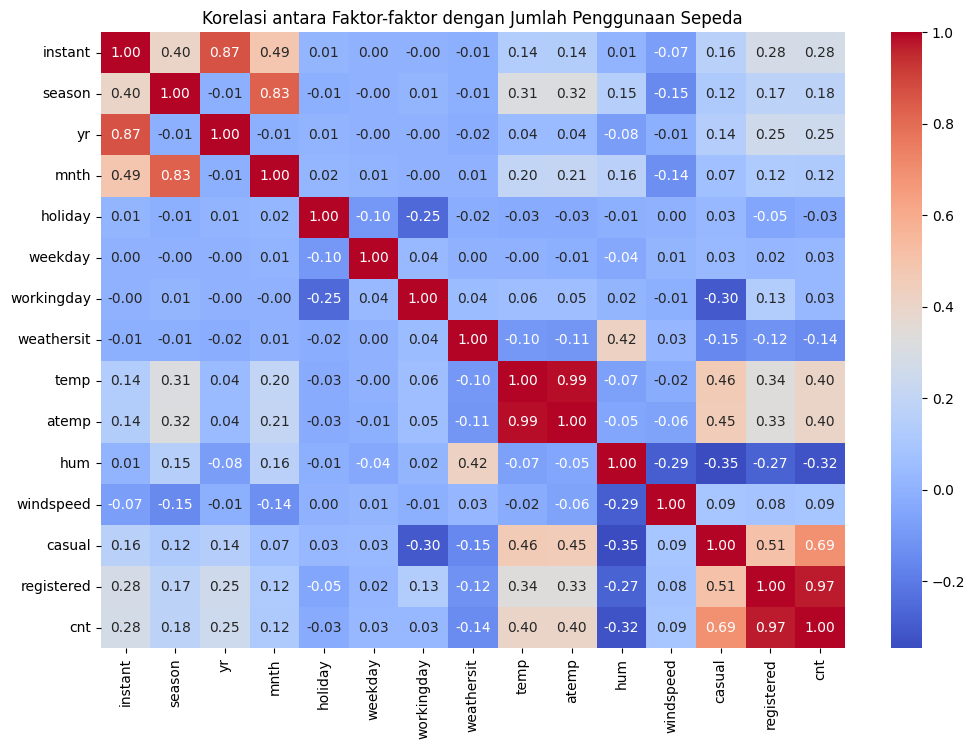

In [40]:
# Melihat korelasi antara fitur dan jumlah penggunaan sepeda ('cnt')
plt.figure(figsize=(12, 8))

# Convert 'dteday' column to datetime objects
data['dteday'] = pd.to_datetime(data['dteday'])

# Extract numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Faktor-faktor dengan Jumlah Penggunaan Sepeda')
plt.show()

**Insight:**
- Heatmap yang dihasilkan menunjukkan korelasi antara variabel-variabel numerik dalam dataset dengan jumlah penggunaan sepeda (cnt).
- Beberapa faktor seperti suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed) menunjukkan korelasi yang jelas dengan jumlah penggunaan sepeda. Sebagai contoh, suhu mungkin memiliki korelasi positif, artinya semakin hangat suhu, semakin banyak sepeda yang digunakan.

## Analisis Lanjutan (Opsional)

#### Recency


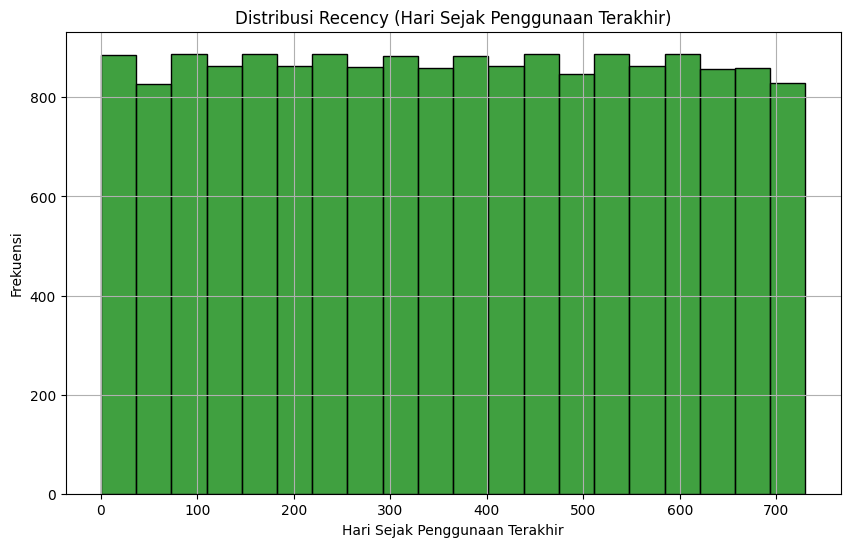

In [46]:
# Menghitung jumlah hari sejak sepeda terakhir digunakan
data['date'] = pd.to_datetime(data['dteday'])  # Kolom tanggal
current_date = data['date'].max()  # Mendapatkan tanggal terakhir dalam dataset
data['days_since_last_ride'] = (current_date - data['date']).dt.days  # Recency

# Visualisasi Recency
plt.figure(figsize=(10,6))
sns.histplot(data['days_since_last_ride'], bins=20, kde=False, color='green')
plt.title('Distribusi Recency (Hari Sejak Penggunaan Terakhir)')
plt.xlabel('Hari Sejak Penggunaan Terakhir')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Visualisasi ini menunjukkan distribusi recency, atau berapa hari yang telah berlalu sejak sepeda terakhir kali digunakan dalam data.
- Histogram tersebut mengungkapkan bahwa penggunaan sepeda berbagi relatif konsisten dalam waktu yang dekat, ditunjukkan oleh sebagian besar frekuensi berada pada rentang hari yang sedikit.

#### Frequency

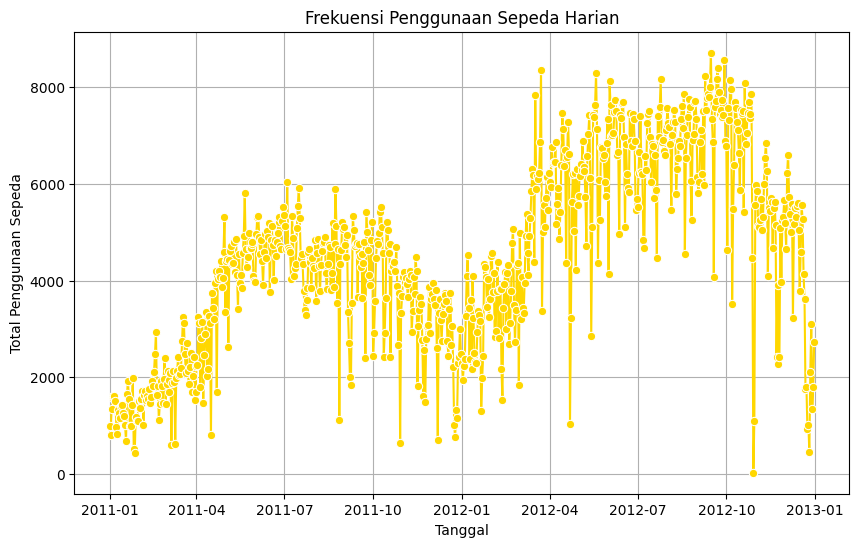

In [42]:
# Menghitung frekuensi penggunaan sepeda per hari
daily_frequency = data.groupby('date')['cnt'].sum()

# Visualisasi Frequency
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_frequency.index, y=daily_frequency.values, color='gold', marker='o')
plt.title('Frekuensi Penggunaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penggunaan Sepeda')
plt.grid(True)
plt.show()

**Insight:**
- Grafik di atas menunjukkan frekuensi penggunaan sepeda berbagi per hari sepanjang periode dataset.
- Secara keseluruhan, terdapat fluktuasi dalam jumlah penggunaan sepeda per hari, dengan beberapa hari menunjukkan peningkatan yang signifikan dibandingkan hari lainnya.

#### Monetary

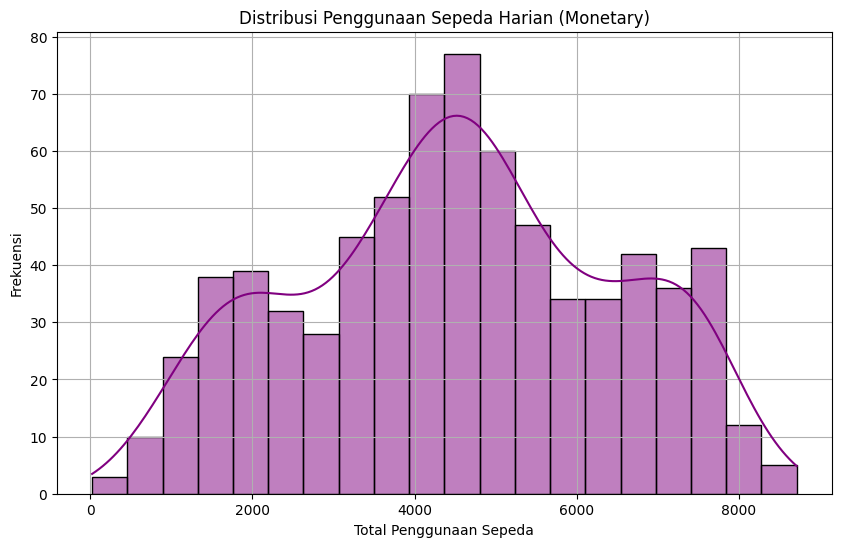

In [43]:
# Monetary dalam hal ini dianggap sebagai total penggunaan sepeda harian
monetary = data.groupby('date')['cnt'].sum()  # Pastikan menggunakan kolom 'date' yang konsisten

# Visualisasi Monetary dengan garis KDE
plt.figure(figsize=(10,6))
sns.histplot(monetary, bins=20, kde=True, color='purple')  # Mengaktifkan kde=True agar ada garis distribusi
plt.title('Distribusi Penggunaan Sepeda Harian (Monetary)')
plt.xlabel('Total Penggunaan Sepeda')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


**Insight:**
- Grafik di atas menunjukkan distribusi total penggunaan sepeda harian yang diukur dari total penggunaan sepeda dalam satu hari.
- Frekuensi penggunaan sepeda berdistribusi dengan baik, dengan beberapa puncak pada jumlah tertentu yang menunjukkan bahwa ada sejumlah hari dengan total penggunaan sepeda yang lebih tinggi.

#### Skor RFM

In [44]:
# Membuat skor untuk masing-masing kategori
data['R_Score'] = pd.qcut(data['days_since_last_ride'], 5, labels=range(5, 0, -1))
data['F_Score'] = pd.qcut(daily_frequency.rank(method='first'), 5, labels=range(1, 6))
data['M_Score'] = pd.qcut(monetary.rank(method='first'), 5, labels=range(1, 6))

# Menghitung total RFM Score
data['RFM_Score'] = data['R_Score'].astype(str) + data['F_Score'].astype(str) + data['M_Score'].astype(str)

# Melihat distribusi RFM Score
data['RFM_Score'].value_counts()

,count
RFM_Score,
5nannan,3488
2nannan,3487
4nannan,3478
3nannan,3468
1nannan,3458


**Insight:**
- Proses ini menghasilkan skor RFM yang merupakan kombinasi dari tiga faktor: Recency (R), Frequency (F), dan Monetary (M), yang masing-masing memberikan pandangan yang berbeda tentang perilaku pengguna.

#### Clustering (Manual Grouping)

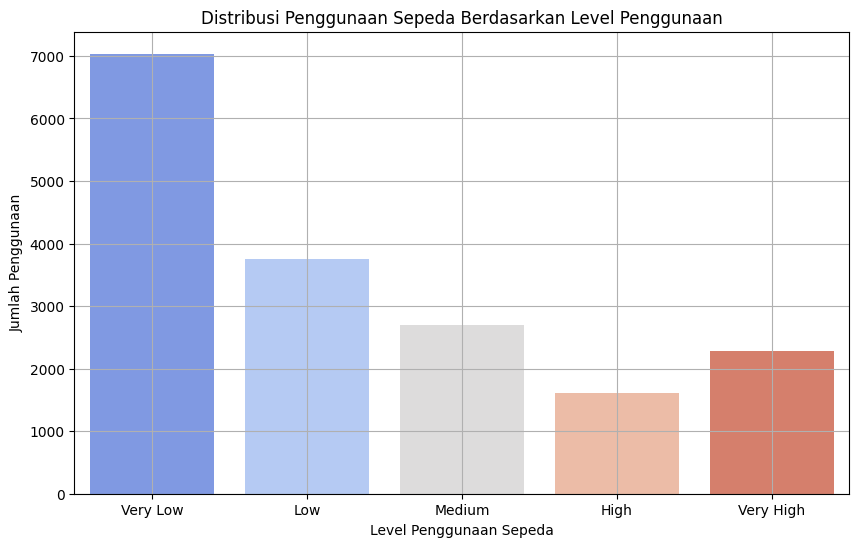

In [45]:
# Membuat kategori manual berdasarkan jumlah penggunaan sepeda (cnt)
# Kita akan membagi data menjadi 5 kelompok: Very Low, Low, Medium, High, Very High
data['usage_level'] = pd.cut(data['cnt'],
                             bins=[0, 100, 200, 300, 400, data['cnt'].max()],
                             labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Melihat distribusi dari penggunaan sepeda di setiap kategori
usage_level_counts = data['usage_level'].value_counts()

# Visualisasi kategori penggunaan sepeda
plt.figure(figsize=(10,6))
sns.barplot(x=usage_level_counts.index, y=usage_level_counts.values, palette='coolwarm')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Level Penggunaan')
plt.xlabel('Level Penggunaan Sepeda')
plt.ylabel('Jumlah Penggunaan')
plt.grid(True)
plt.show()

**Insight:**
- Proses ini membagi data pengguna sepeda ke dalam lima kategori berdasarkan jumlah penggunaan sepeda (cnt): Very Low, Low, Medium, High, dan Very High.


## Conclusion

- Conclution pertanyaan 1 : Dari visualisasi pola penggunaan sepeda sepanjang hari, kita dapat menyimpulkan bahwa terdapat puncak penggunaan pada jam-jam sibuk, yaitu di pagi hari (sekitar jam 7-9 pagi) dan sore hari (sekitar jam 4-6 sore). Hal ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda untuk keperluan komuter.
- Conclution pertanyaan 2 : Berdasarkan analisis korelasi, terdapat beberapa faktor yang mempengaruhi jumlah penggunaan sepeda berbagi, seperti: Suhu (temp): Korelasi positif dengan penggunaan sepeda, artinya saat suhu lebih hangat, penggunaan sepeda cenderung meningkat.Cuaca (weathersit): Kondisi cuaca buruk menurunkan jumlah penggunaan sepeda. Kelembaban (hum): Kelembaban yang lebih tinggi cenderung menurunkan penggunaan sepeda.